# Deact Model - GBM Splitting on Activation Status

### Imports

In [1]:
import deact
from datetime import datetime
from pyspark.sql import SparkSession
from IPython.display import display, Image

### SparkSession

In [2]:
warehouse_location = 'hdfs://cerebro-namenode-vip.snc1/user/grp_gdoop_clv/grp_gdoop_clv_hiveDB.db'
python_location = './ANACONDA/anaconda2_env/bin/python'
archives_location = 'hdfs:////user/grp_gdoop_admin/anaconda/anaconda2_env.zip#ANACONDA'

spark = SparkSession\
    .builder\
    .master('yarn')\
    .appName('deact-model')\
    .config('spark.submit.deployMode','client')\
    .config('spark.executor.instances', 50)\
    .config('spark.yarn.appMasterEnv.PYSPARK_PYTHON',python_location)\
    .config('spark.yarn.dist.archives',archives_location)\
    .config('spark.sql.warehouse.dir',warehouse_location)\
    .config('spark.yarn.queue','public')\
    .enableHiveSupport()\
    .getOrCreate()

spark

### Parameters

In [3]:
train_date = '2018-10-15'
score_date = None
train_pct = 0.10
validate_pct = 0.10
validate_model = True
score_active_users = False
save_results = True

### Workflow

In [5]:
model_collection = deact.workflow(spark, train_date, score_date, train_pct, validate_pct, validate_model, score_active_users, save_results)

model_collection


[ 2019-10-18 01:35:17.092655 ] : Beginning DEACT MODEL pipeline with parameters:

	Training date = 2018-10-15
	Proportion of training data used to:
		Train model = 10%
		Validate model = 10%
		Not used = 80%
	Not making predictions on scoring data

DATA PIPELINE

[ 2019-10-18 01:35:17.093896 ] : Loading training feature data for activation = 0
[ 2019-10-18 01:35:22.923753 ] : Splitting training data into model training and validation data for activation = 0
[ 2019-10-18 01:35:23.738443 ] : Creating feature engineering pipeline for activation = 0
[ 2019-10-18 01:40:16.638089 ] : Feature engineering model training data for activation = 0
[ 2019-10-18 01:40:17.743126 ] : Feature engineering model validation data for activation = 0

MODELING

[ 2019-10-18 01:40:18.627697 ] : Training model for activation = 0

PREDICTING DEACTIVATIONS

[ 2019-10-18 02:17:32.220475 ] : Making predictions on validation data for activation = 0
[ 2019-10-18 02:17:32.379547 ] : Saving validation predictions to 

[<Model(activation=0, train_date=2018-10-15)>,
 <Model(activation=1, train_date=2018-10-15)>]

### Model Summaries

In [6]:
for m in model_collection:
    print('\nACTIVATION: '+str(m.activation))
    display(m.count_df)
    display(m.eval_df)


ACTIVATION: 0


,predicted_0,predicted_1,total
actual_0,629482,386446,1015928
actual_1,261371,1160808,1422179
total,890853,1547254,2438107


,N,precision,recall,f1,predOverActualN
0,1015928,0.706606,0.619613,0.660256,0.876886
1,1422179,0.750238,0.816218,0.781838,1.087946
weighted,2438107,0.732057,0.734295,0.731177,1.000000



ACTIVATION: 1


,predicted_0,predicted_1,total
actual_0,3549,75804,79353
actual_1,3173,487050,490223
total,6722,562854,569576


,N,precision,recall,f1,predOverActualN
0,79353,0.527968,0.044724,0.082463,0.084710
1,490223,0.865322,0.993527,0.925004,1.148159
weighted,569576,0.818322,0.861341,0.807621,1.000000


### Display Plots

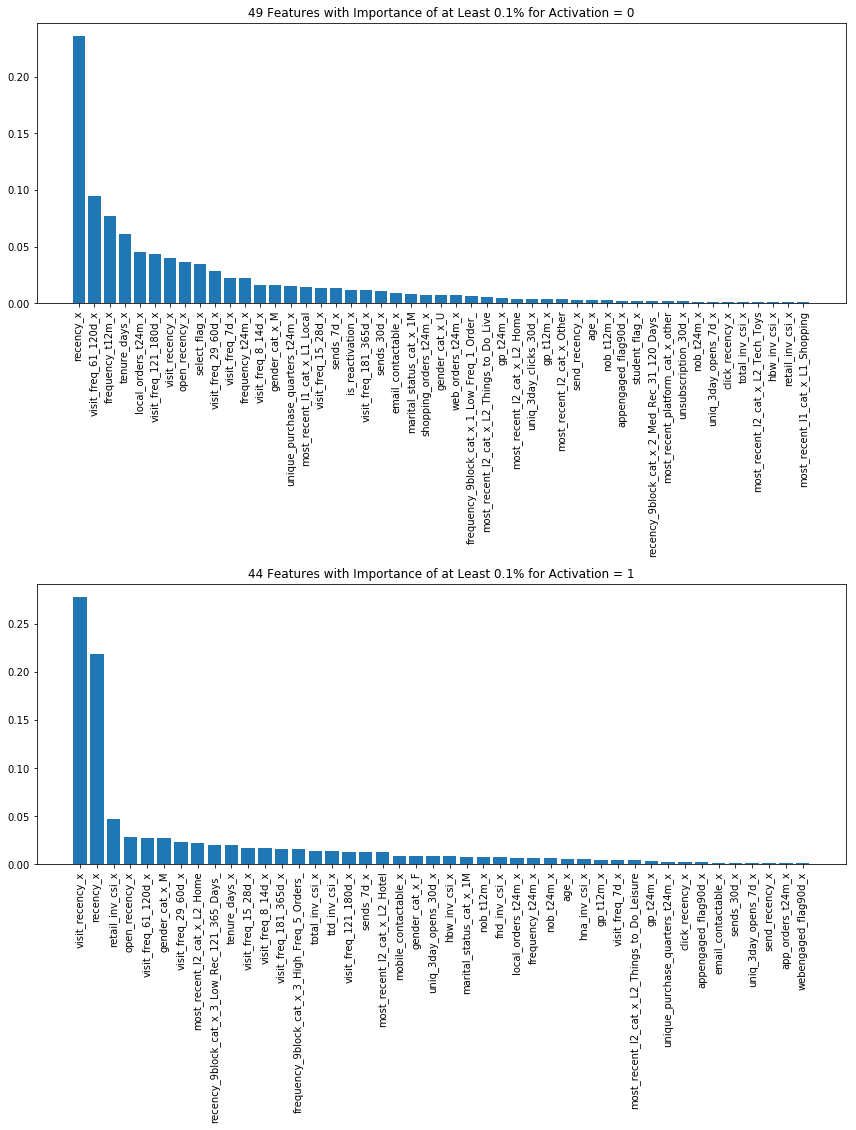

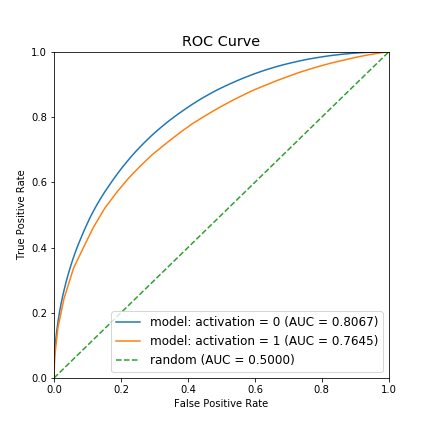

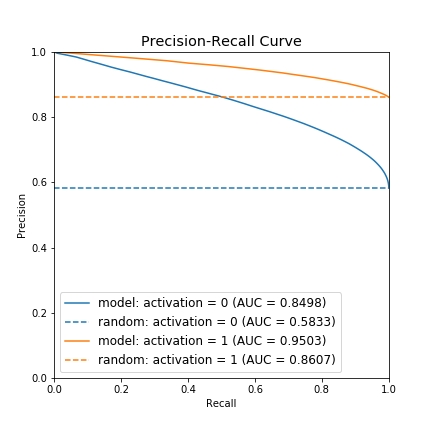

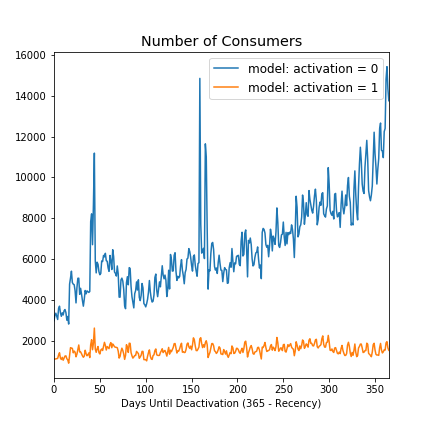

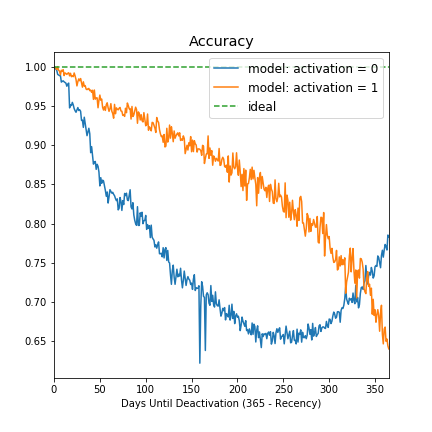

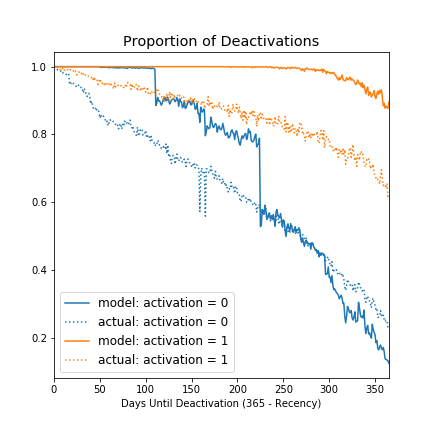

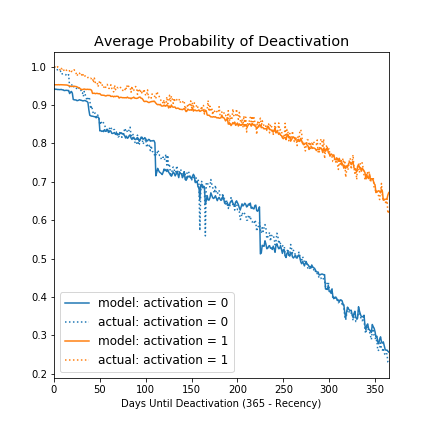

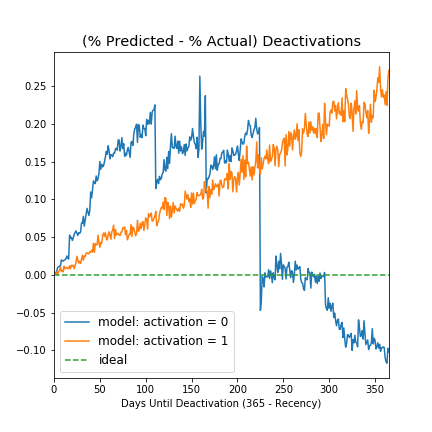

In [16]:
plot_names = ['feat_imp','roc','pr','count_users','accuracy','pct_deact_pred','avg_prob_deact','diff_pct_deact']

for p in plot_names:
    display(Image('model_evaluation/plot_'+p+'.png'))